In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [9]:
#Import Api Key
weather_api_key = "1b1f49a514a09ec6638879080888d881"


In [10]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

574

In [12]:
# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + "1b1f49a514a09ec6638879080888d881"

# Counters
city_counter = 1
set_counter = 1

# Create the lists to hold relative data
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Started")

# Create a query url for each city in the cities list to get json response
for i, city in enumerate(cities):
    
    # Group cities as sets of 50s
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        city_counter = 1
         
    # Create API url for each city
    query_url = base_url +"&q=" + city
    
    # Get json respose for each city
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    
    # Increase city counter
    city_counter += 1
    
   # Add the values to the lists
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found. Skipping...")
        pass
        
print("Completed")

Started
Processing Record 1 of Set 1 | batemans bay
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | yumbe
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | ust-kuyga
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | saint george
Processing Record 12 of Set 1 | esil
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | hasaki
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | mizdah
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | butzow
Processing Record 20 of Set 1 | lasa
Processing Record 21 of Set 1 | dori
Processing Record 22 of Set 1 | russell
Processing Record 23 of Set 1 | bredasdorp
Processing Record 24

Processing Record 41 of Set 4 | vao
Processing Record 42 of Set 4 | thompson
Processing Record 43 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 44 of Set 4 | bahia honda
Processing Record 45 of Set 4 | bani walid
Processing Record 46 of Set 4 | sioux lookout
Processing Record 47 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 48 of Set 4 | port hedland
Processing Record 49 of Set 4 | hilo
Processing Record 50 of Set 4 | elbrus
Processing Record 1 of Set 5 | thohoyandou
Processing Record 2 of Set 5 | manta
Processing Record 3 of Set 5 | lolua
City not found. Skipping...
Processing Record 4 of Set 5 | itacoatiara
Processing Record 5 of Set 5 | batagay-alyta
Processing Record 6 of Set 5 | yar-sale
Processing Record 7 of Set 5 | sampit
Processing Record 8 of Set 5 | abashiri
Processing Record 9 of Set 5 | volot
Processing Record 10 of Set 5 | iskateley
Processing Record 11 of Set 5 | davila
Processing Record 12 of Set 5 | pampa
Processing Record

Processing Record 31 of Set 8 | bhakkar
Processing Record 32 of Set 8 | great yarmouth
Processing Record 33 of Set 8 | edd
Processing Record 34 of Set 8 | sur
Processing Record 35 of Set 8 | elizabeth city
Processing Record 36 of Set 8 | jumla
Processing Record 37 of Set 8 | verkhoyansk
Processing Record 38 of Set 8 | kovdor
Processing Record 39 of Set 8 | road town
Processing Record 40 of Set 8 | maragogi
Processing Record 41 of Set 8 | todos santos
Processing Record 42 of Set 8 | araouane
Processing Record 43 of Set 8 | namibe
Processing Record 44 of Set 8 | nanakuli
Processing Record 45 of Set 8 | nishihara
Processing Record 46 of Set 8 | nouakchott
Processing Record 47 of Set 8 | mackay
Processing Record 48 of Set 8 | nagua
Processing Record 49 of Set 8 | dergachi
Processing Record 50 of Set 8 | komsomolskiy
Processing Record 1 of Set 9 | yakima
Processing Record 2 of Set 9 | jurbarkas
Processing Record 3 of Set 9 | inuvik
Processing Record 4 of Set 9 | burayevo
Processing Record 5

Processing Record 17 of Set 12 | tucumcari
Processing Record 18 of Set 12 | dicabisagan
Processing Record 19 of Set 12 | birao
Processing Record 20 of Set 12 | junnar
Processing Record 21 of Set 12 | sheridan
Processing Record 22 of Set 12 | inta
Processing Record 23 of Set 12 | tilichiki
Processing Record 24 of Set 12 | kargopol
Completed


In [13]:
# Create a dictionary to keep data 
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Create the data frame and count variables for each columns
weather_df = pd.DataFrame(weather_data)
weather_df.count()
weather_df.to_csv("Weather_Py.csv")

In [14]:
# Display the data frame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Batemans Bay,89,AU,1610412519,40,-35.7167,150.1833,84.99,4.00
1,Yellowknife,20,CA,1610412519,92,62.4560,-114.3525,8.60,9.22
2,Khatanga,100,RU,1610412519,89,71.9667,102.5000,-18.33,3.44
3,Yumbe,0,UG,1610412519,33,3.4651,31.2469,71.02,4.16
4,Ushuaia,75,AR,1610412519,76,-54.8000,-68.3000,46.40,13.80


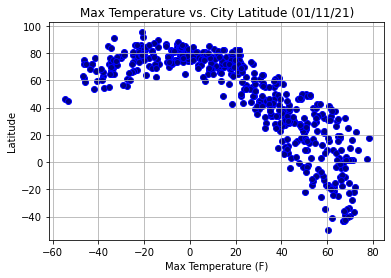

In [15]:
# Create a scatter plot for temperature and latitude
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o", facecolor = "navy", edgecolor="blue")
plt.title("Max Temperature vs. City Latitude (%s)" % time.strftime("%x"))
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.grid()
plt.savefig("Max Temp vs Lat.png")
plt.show()

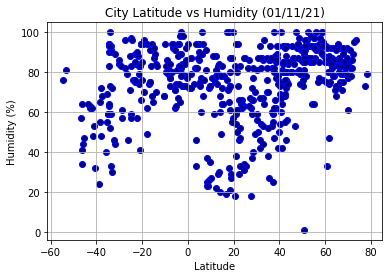

In [16]:
# Create a scatter plot for humidity and latitude
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o", facecolor = "navy", edgecolor="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))
plt.savefig("Lat vs Humidity.png")
plt.grid()
plt.show()

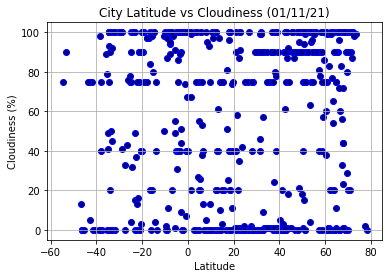

In [17]:
# Create a scatter plot for latitdue and cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o", facecolor = "navy", edgecolor="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.savefig("Lat vs Cloudiness.png")
plt.grid()
plt.show()

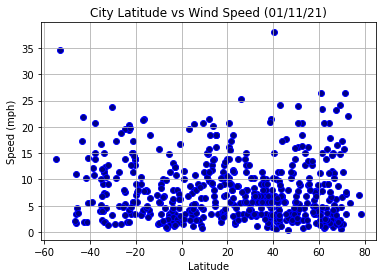

In [18]:
# Create a scatter plot for Wind Speed and Latitude 
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o", facecolor = "navy", edgecolor="blue")
plt.xlabel("Latitude")
plt.ylabel("Speed (mph)")
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x"))
plt.savefig("Lat vs Wind Speed.png")
plt.grid()
plt.show()

In [19]:
# Create Northern And Southern Hemisphere Data Frame

Northern_Hemisphere=weather_df[weather_df["Lat"]>0]
Southern_Hemisphere=weather_df[weather_df["Lat"]<0]

In [20]:
# Define Linear Regression Function
def Linear_Regression(x_values,y_values,xlabel,ylabel,annotate_coorid=(0,0)):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,annotate_coorid,fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{xlabel} vs {ylabel}")
    plt.show()

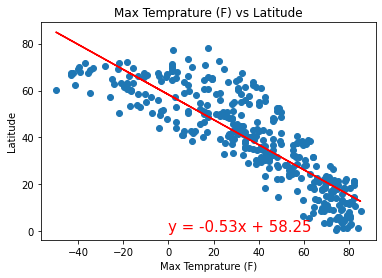

In [21]:
#Run Linear Regression
Linear_Regression(Northern_Hemisphere["Max Temp"],Northern_Hemisphere["Lat"],"Max Temprature (F)","Latitude")

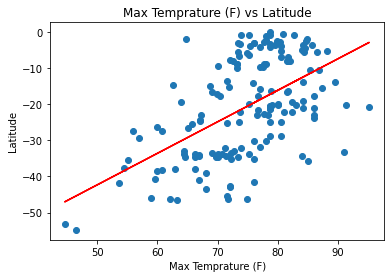

In [22]:
Linear_Regression(Southern_Hemisphere["Max Temp"],Southern_Hemisphere["Lat"],"Max Temprature (F)","Latitude",(35,-5))


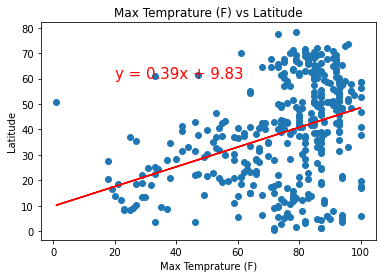

In [23]:
Linear_Regression(Northern_Hemisphere["Humidity"],Northern_Hemisphere["Lat"],"Max Temprature (F)","Latitude",(20,60))


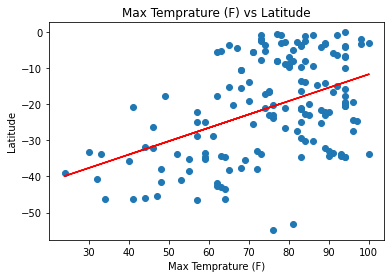

In [24]:
Linear_Regression(Southern_Hemisphere["Humidity"],Southern_Hemisphere["Lat"],"Max Temprature (F)","Latitude",(20,-15))


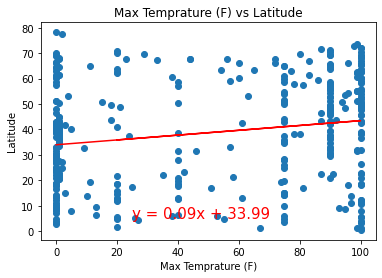

In [25]:
Linear_Regression(Northern_Hemisphere["Cloudiness"],Northern_Hemisphere["Lat"],"Max Temprature (F)","Latitude",(25,5))


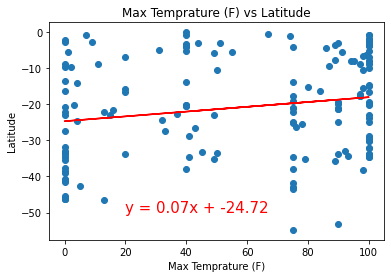

In [26]:
Linear_Regression(Southern_Hemisphere["Cloudiness"],Southern_Hemisphere["Lat"],"Max Temprature (F)","Latitude",(20,-50))


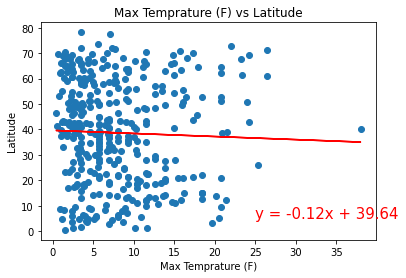

In [27]:
Linear_Regression(Northern_Hemisphere["Wind Speed"],Northern_Hemisphere["Lat"],"Max Temprature (F)","Latitude",(25,5))


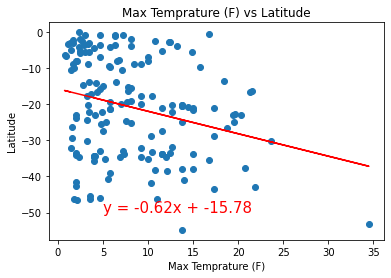

In [28]:
Linear_Regression(Southern_Hemisphere["Wind Speed"],Southern_Hemisphere["Lat"],"Max Temprature (F)","Latitude",(5,-50))
